# Amazon Livros

## Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from termcolor import colored
from scipy.stats import norm
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import plotly.express as px
import plotly.offline as py


## Carregando o dataset

In [2]:
df = pd.read_csv("/content/dados.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
print(colored("O arquivo possui {} rows e {} colunas".format(df.shape[0],df.shape[1]),attrs=["bold"]))

O arquivo possui 550 rows e 7 colunas


## Tipo de variaveis e valores faltantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


As features não possuem valores ausentes

### Correlação

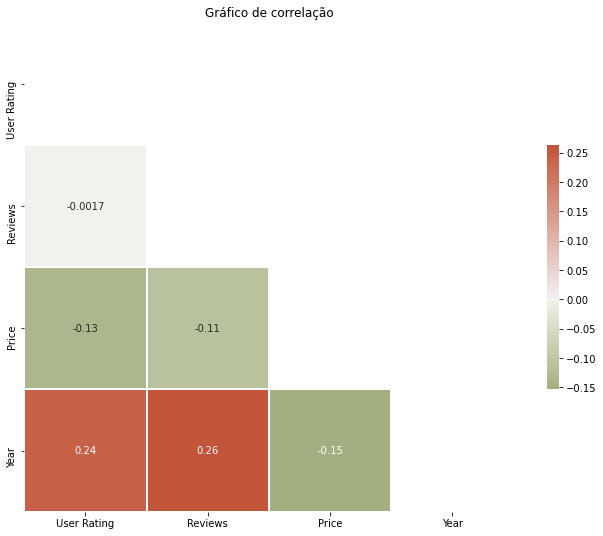

In [ ]:
f, ax = plt.subplots(figsize=(12,9))
mask=np.triu(np.ones_like(df.corr(),dtype=bool)) # Retira o espelho para não mostrar a parte de cima
cmap= sns.diverging_palette(100,20, as_cmap=True)
sns.heatmap(df.corr(), annot=True, center=0,square=True, linewidths=1,
            cbar_kws={"shrink":.5}, cmap=cmap,mask=mask)
plt.title("Gráfico de correlação")
plt.show()

Olhando o gráfico é possível notar que não existe uma correlação forte entre nenhuma das features, as que tiveram uma relação um pouco maior é:
*   Ano e avaliação
*   Ano e reviews
*   Ano e Preço

Faz todo muito sentido algumas dessas relações como Ano e preço, é de se esperar que ao passar dos anos em que o livro envelhece ele acabe abaixando o preço (Embora 0,15 é uma correlação muito fraca para assumir que essa relação é verdadeira)


## Tipo de Gênero

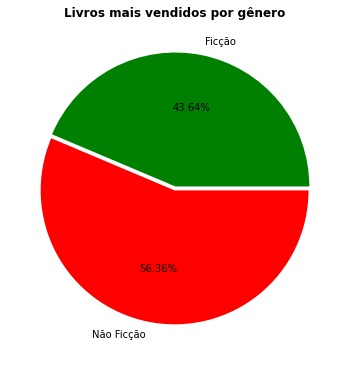

In [ ]:
plt.figure(figsize=(12,5))
plt.pie(df["Genre"].value_counts().sort_values(), labels=["Ficção","Não Ficção"],
        autopct='%1.2f%%', shadow=False, colors=["Green", "red"], explode=[0.03,0])
plt.subplots_adjust(bottom=0, top=0.93, left=0.5, right=1)
plt.title("Livros mais vendidos por gênero", fontweight="bold")
plt.show()


56.36% dos livros mais vendidos são de ficção e 43.64% são de não ficção.

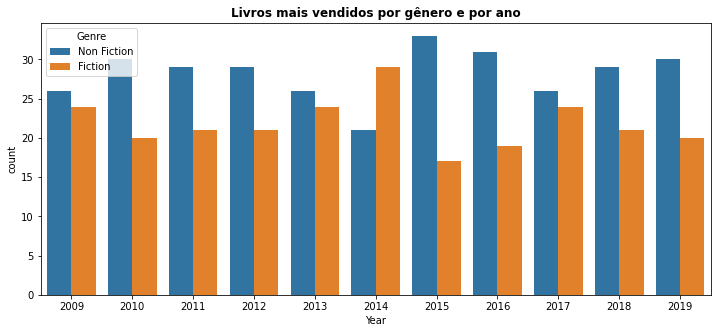

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x=df["Year"], hue=df["Genre"])
plt.title("Livros mais vendidos por gênero e por ano",fontweight="bold")
plt.show()


Em todos os anos os livros de não ficção foram os mais vendidos 

## Avaliações (User Rating)

In [ ]:
b_year_ur= []
b_nf_ur=[]
b_f_ur=[]

year = df["Year"].unique().tolist() #Vai colocar em uma lista os valores dos anos unicos
year.sort() #Vai organizar os anos de forma crescente


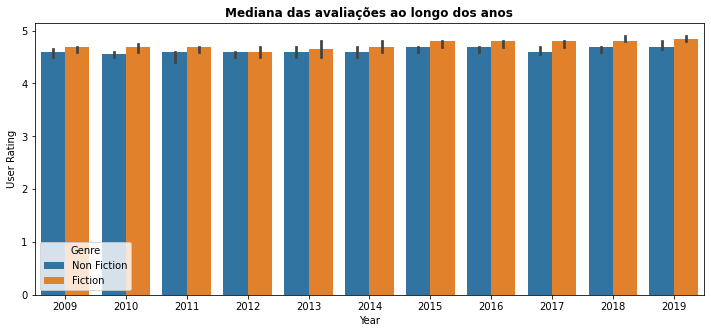

In [ ]:
from numpy import median
plt.figure(figsize=(12,5))
sns.barplot(data=df, x= df["Year"], y= df["User Rating"], hue= df["Genre"], estimator=median)
plt.title("Mediana das avaliações ao longo dos anos", fontweight="bold")
plt.show()

Parece não haver grandes diferenças nas notas de avaliações ao longo dos anos 

In [ ]:
trace1=go.Box(y=df.loc[df["Genre"]=="Fiction", "User Rating"],
       name="Ficção",
       marker = {'color': '#f39c12'})
trace2=go.Box(y=df.loc[df["Genre"]=="Non Fiction", "User Rating"],
       name="Não Ficção",
       marker = {'color': '#e67e22'})
data = [trace1,trace2]
layout= go.Layout(title = 'Dispersão das Notas dadas aos livros',
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Gênero'},
                   yaxis = {'title': 'User Rating'},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')
fig= go.Figure(data=data, layout= layout)

In [ ]:
py.offline.plot(fig, filename='name.html')

'name.html'

In [ ]:
avaliacao=df.groupby(["Name","Genre"], as_index=False)["User Rating"].median()
avaliacao.iloc[avaliacao["User Rating"].sort_values().index][0:7]

,Name,Genre,User Rating
231,The Casual Vacancy,Fiction,3.3
101,Go Set a Watchman: A Novel,Fiction,3.6
88,Fifty Shades of Grey: Book One of the Fifty Sh...,Fiction,3.8
251,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Fiction,3.9
20,Allegiant,Fiction,3.9
239,The Elegance of the Hedgehog,Fiction,4.0
209,StrengthsFinder 2.0,Non Fiction,4.0


https://pt.wikipedia.org/wiki/The_Casual_Vacancy

## Reviews

In [ ]:
reviews=pd.DataFrame(df.groupby(["Year","Genre"],)["Reviews"].mean())
reviews.reset_index(inplace=True)
trace1 = go.Scatter(x=reviews["Year"].sort_values().unique(),
                    y= reviews.loc[reviews["Genre"]=="Fiction", "Reviews"],
                    mode= "markers+lines",
                    name = "Ficção")
trace2 = go.Scatter(x=reviews["Year"].sort_values().unique(),
                    y= reviews.loc[reviews["Genre"]=="Non Fiction", "Reviews"],
                    mode= "markers+lines",
                    name = "Não Ficção")
data= [trace1, trace2]
layout= go.Layout(title="Número de Reviews feitas",
                  titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Anos'},
                   yaxis = {'title': 'Total de Reviews'},
                  )
fig= go.Figure(data=data, layout= layout)
fig

In [ ]:
py.offline.plot(fig, filename='review.html')

'review.html'

É possível notar que em geral o número de reviews feitas de não ficção são menores que o de ficção, mas isso mudou em 2018

##### Fazer Decomposição de serie temporal

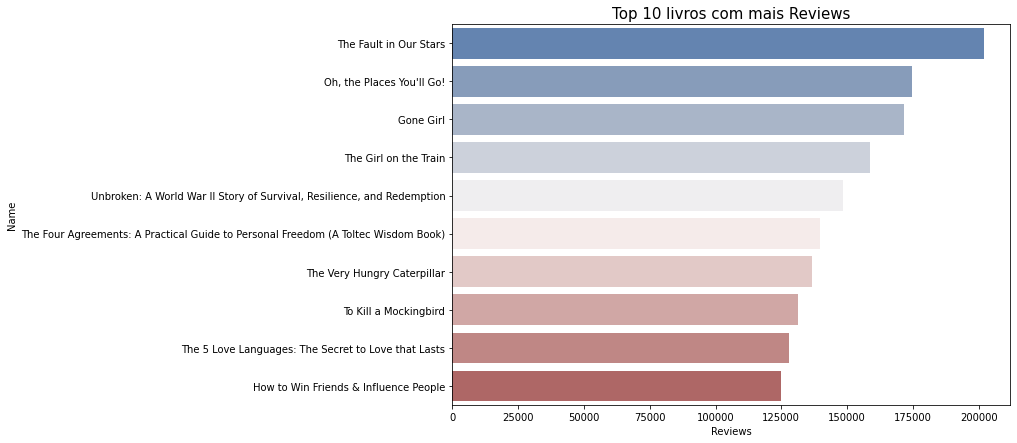

In [ ]:
r_livros=pd.DataFrame(df.groupby(["Name","Genre"])["Reviews"].sum().sort_values(ascending=False))[0:10]
r_livros.reset_index(inplace=True)
plt.figure(figsize=(10,7))
sns.barplot(y="Name",x="Reviews", data=r_livros,palette="vlag")
plt.title("Top 10 livros com mais Reviews", fontsize=15)
plt.show()

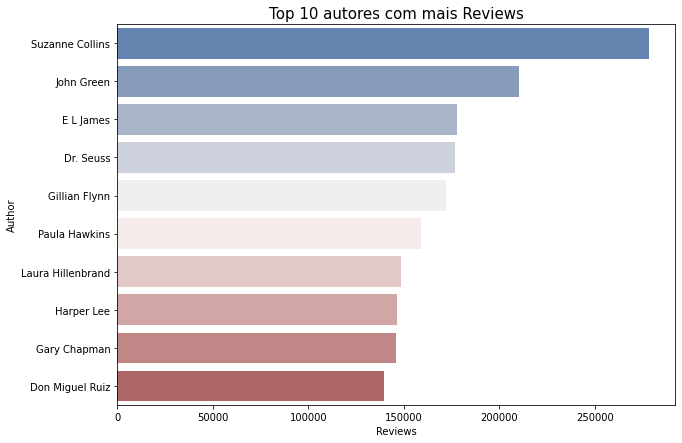

In [ ]:
a_livros=pd.DataFrame(df.groupby(["Author","Genre"])["Reviews"].sum().sort_values(ascending=False))[0:10]
a_livros.reset_index(inplace=True)
plt.figure(figsize=(10,7))
sns.barplot(y="Author",x="Reviews", data=a_livros,palette="vlag")
plt.title("Top 10 autores com mais Reviews", fontsize=15)
plt.show()

## Análise de autores

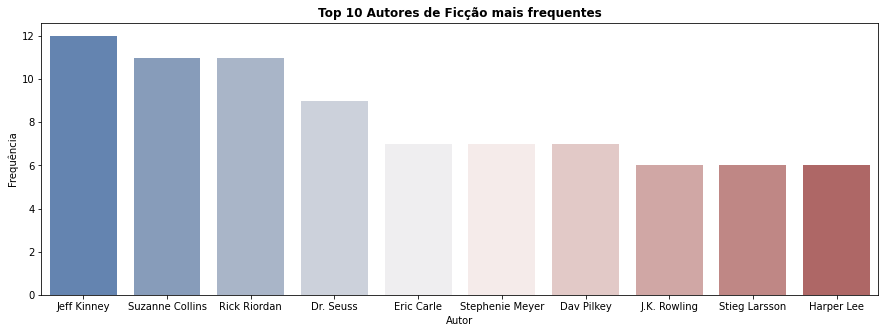

In [ ]:
autores_ficcao=pd.DataFrame(df.loc[df["Genre"]=="Fiction"].groupby("Author").size().sort_values(ascending=False)[0:10])
autores_ficcao.reset_index(inplace=True)
autores_ficcao.columns=["Autor","Livros"]

plt.figure(figsize=(15,5))
sns.barplot(x="Autor",y="Livros",data=autores_ficcao, palette="vlag")
plt.title("Top 10 Autores de Ficção mais frequentes",fontweight="bold")
plt.ylabel('Frequência')
plt.show()

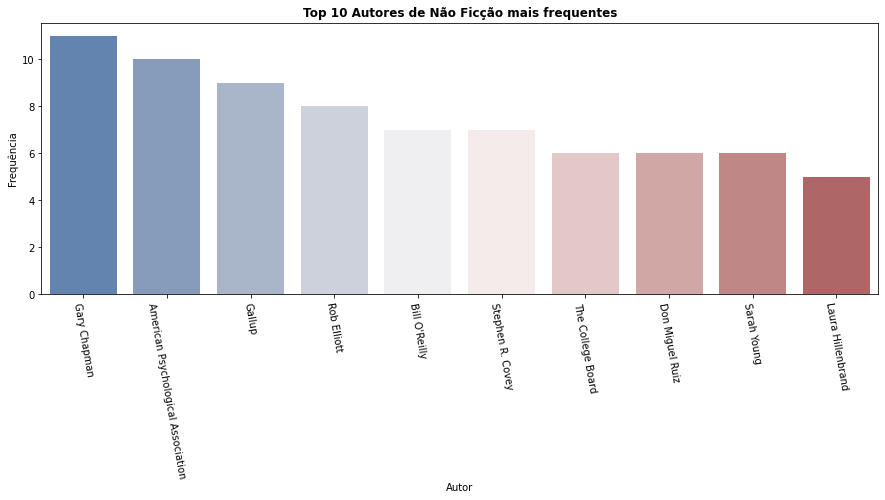

In [ ]:
autores_nficcao=pd.DataFrame(df.loc[df["Genre"]=="Non Fiction"].groupby("Author").size().sort_values(ascending=False)[0:10])
autores_nficcao.reset_index(inplace=True)
autores_nficcao.columns=["Autor","Livros"]

plt.figure(figsize=(15,5))
sns.barplot(x="Autor",y="Livros",data=autores_nficcao, palette="vlag")
plt.title("Top 10 Autores de Não Ficção mais frequentes",fontweight="bold")
plt.xticks(rotation=-80)
plt.ylabel('Frequência')
plt.show()

## Análise de Livros Mais Frequentes

In [ ]:
livros_frequentesFiccao=pd.DataFrame(df.loc[df["Genre"]=="Fiction"].groupby(["Name"]).size().sort_values(ascending=False))[0:10]
livros_frequentesFiccao.reset_index(inplace=True)
livros_frequentesFiccao.columns=["Name","Frequencia"]
livros_reviews=pd.DataFrame(df.groupby(["Name","Genre"])["Reviews"].sum().sort_values(ascending=False)).reset_index()
livros_frequentesFiccao=livros_frequentesFiccao.merge(livros_reviews, on = "Name", how = "left")
livros_frequentesFiccao["Name"][9]="Game Of Thrones Boxed Set"

livros_frequentesnFiccao=pd.DataFrame(df.loc[df["Genre"]=="Non Fiction"].groupby(["Name"]).size().sort_values(ascending=False))[0:10]
livros_frequentesnFiccao.reset_index(inplace=True)
livros_frequentesnFiccao.columns=["Name","Frequencia"]
livros_reviews=pd.DataFrame(df.groupby(["Name","Genre"])["Reviews"].sum().sort_values(ascending=False)).reset_index()
livros_frequentesnFiccao=livros_frequentesnFiccao.merge(livros_reviews, on = "Name", how = "left")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



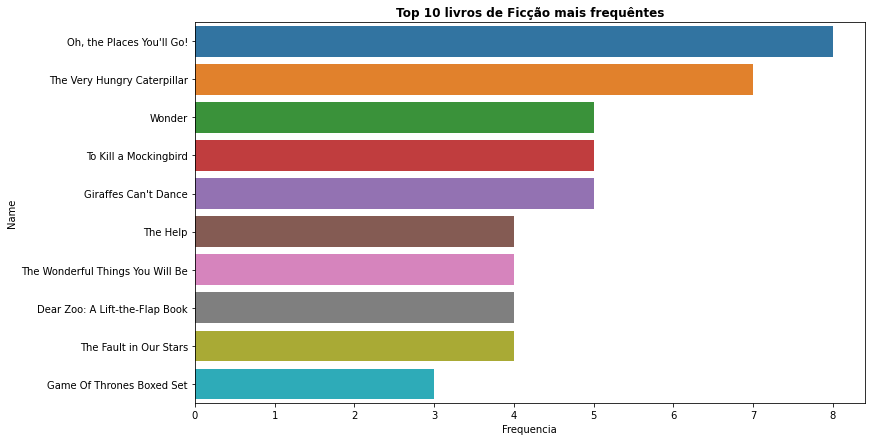

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x="Frequencia", y="Name", data=livros_frequentesFiccao)
plt.title("Top 10 livros de Ficção mais frequêntes",fontweight="bold",fontsize=12)
plt.show()

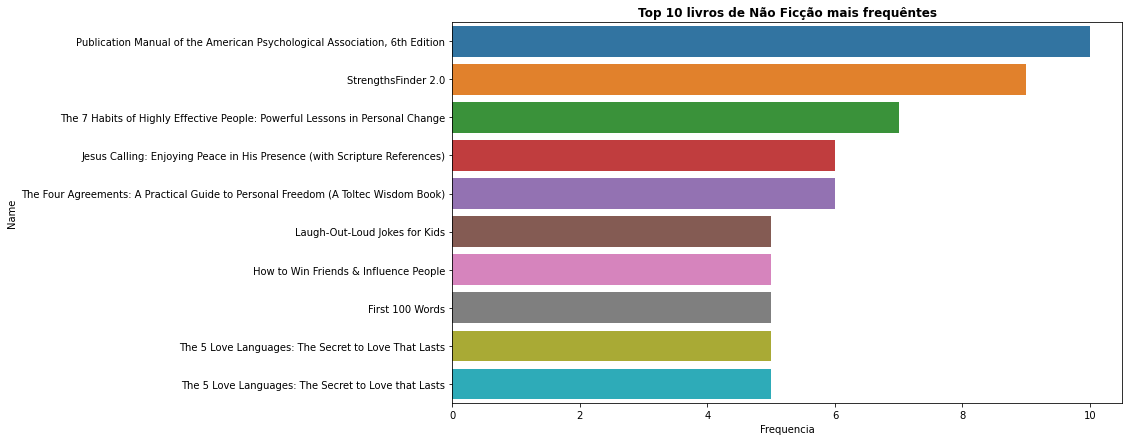

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x="Frequencia", y="Name", data=livros_frequentesnFiccao)
plt.title("Top 10 livros de Não Ficção mais frequêntes",fontweight="bold",fontsize=12)
plt.show()

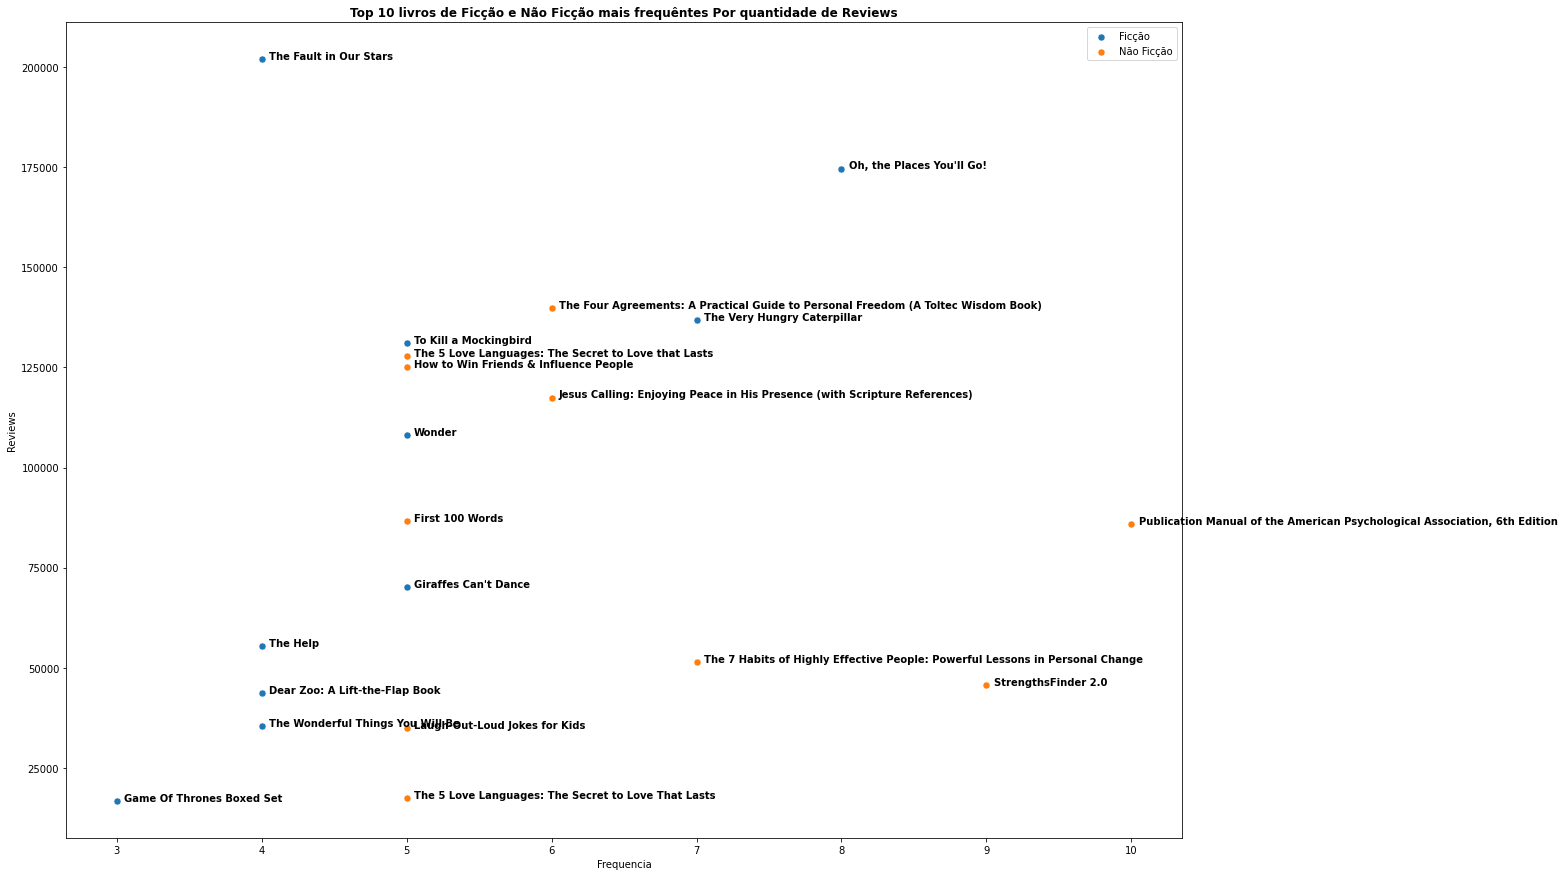

In [ ]:
plt.figure(figsize=(20,15))
p1=sns.scatterplot(x="Frequencia",y="Reviews",data=livros_frequentesFiccao, s=50)
for line in range(0,livros_frequentesFiccao.shape[0]):
     p1.text(livros_frequentesFiccao.Frequencia[line]+0.05, livros_frequentesFiccao.Reviews[line]+0.05, 
     livros_frequentesFiccao.Name[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

p2=sns.scatterplot(x="Frequencia",y="Reviews",data=livros_frequentesnFiccao, s=50)
for line in range(0,livros_frequentesnFiccao.shape[0]):
     p1.text(livros_frequentesnFiccao.Frequencia[line]+0.05, livros_frequentesnFiccao.Reviews[line], 
     livros_frequentesnFiccao.Name[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')
plt.title("Top 10 livros de Ficção e Não Ficção mais frequêntes Por quantidade de Reviews",fontweight="bold",fontsize=12)
plt.legend(["Ficção","Não Ficção"])
plt.show()


## Preço

In [ ]:
price=pd.DataFrame(df.groupby(["Year","Genre"],)["Price"].median())
price.reset_index(inplace=True)
trace1 = go.Scatter(x=price["Year"].sort_values().unique(),
                    y= price.loc[price["Genre"]=="Fiction", "Price"],
                    mode= "markers+lines",
                    name = "Ficção")
trace2 = go.Scatter(x=price["Year"].sort_values().unique(),
                    y= price.loc[price["Genre"]=="Non Fiction", "Price"],
                    mode= "markers+lines",
                    name = "Não Ficção")
data= [trace1, trace2]
layout= go.Layout(title="Média dos preços dos livros ao longo dos anos",
                  titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   xaxis = {'title': 'Anos'},
                   yaxis = {'title': 'Preços'},
                  )
fig= go.Figure(data=data, layout= layout)
fig

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



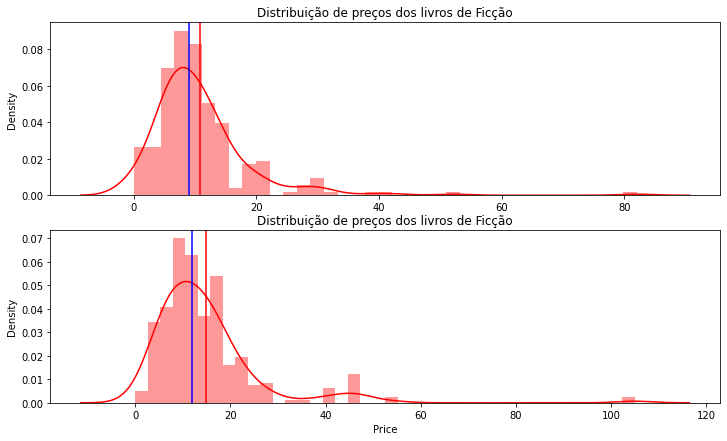

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(2,1,1)
sns.distplot(df.loc[df["Genre"]=="Fiction","Price"],color='red')
plt.title('Distribuição de preços dos livros de Ficção',fontsize=12)
plt.axvline(df.loc[df["Genre"]=="Fiction","Price"].mean(), color="red")
plt.axvline(df.loc[df["Genre"]=="Fiction","Price"].median(), color="blue")
plt.xlabel("")
plt.subplot(2,1,2)
sns.distplot(df.loc[df["Genre"]=="Non Fiction","Price"],color='red')
plt.title('Distribuição de preços dos livros de Ficção',fontsize=12)
plt.axvline(df.loc[df["Genre"]=="Non Fiction","Price"].mean(), color="red")
plt.axvline(df.loc[df["Genre"]=="Non Fiction","Price"].median(), color="blue")
plt.show()


In [ ]:
livros_caros=pd.DataFrame(df.groupby(["Name","Genre"])["Price"].median())
livros_caros.reset_index(inplace=True)
livros_caros.dropna(inplace=True)
livros_caros=livros_caros.iloc[livros_caros["Price"].sort_values(ascending=False).index][0:10]


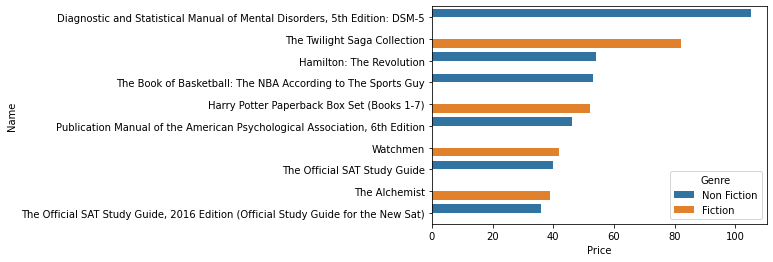

In [ ]:
sns.barplot(x="Price",y="Name",data=livros_caros, hue="Genre")

In [ ]:
livros_caros

,Name,Genre,Price
56,Diagnostic and Statistical Manual of Mental Di...,Non Fiction,105.0
307,The Twilight Saga Collection,Fiction,82.0
112,Hamilton: The Revolution,Non Fiction,54.0
228,The Book of Basketball: The NBA According to T...,Non Fiction,53.0
115,Harry Potter Paperback Box Set (Books 1-7),Fiction,52.0
191,Publication Manual of the American Psychologic...,Non Fiction,46.0
333,Watchmen,Fiction,42.0
281,The Official SAT Study Guide,Non Fiction,40.0
220,The Alchemist,Fiction,39.0
282,"The Official SAT Study Guide, 2016 Edition (Of...",Non Fiction,36.0


## Nuvem de Palavras

In [ ]:
#Importando wordcloud
!pip install wordcloud -q

In [ ]:
#importando os pacotes
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#Juntando tudo em um unico texto 
all_name= " " .join(s for s in df["Name"])
#Ver quantas palavras
print("A quantidade de palavras : {}". format(len(all_name)))

A quantidade de palavras : 27327


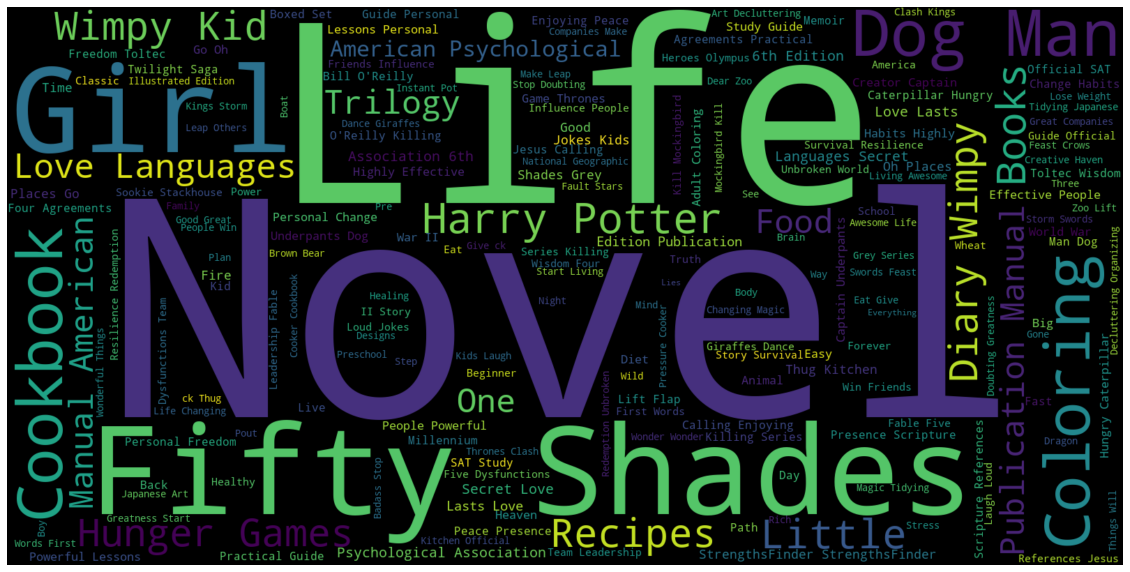

In [ ]:
#lista de stopword
stopwords= set(STOPWORDS)
stopwords.update(["Book"])
#Gera uma wordcloud
wordcloud= WordCloud(stopwords=stopwords,
                     background_color="black",
                     width=1600, height=800).generate(all_name)
 
#Mostra imagem
fig, ax= plt.subplots(figsize=(20,15))
ax.imshow(wordcloud, interpolation="bilinear")
ax.set_axis_off()

In [3]:
df.loc[df["Author"]=="Jeff Kinney"]

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
435,The Meltdown (Diary of a Wimpy Kid Book 13),Jeff Kinney,4.8,5898,8,2018,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction
